### Import your dependencies

In [1]:
from twitter import *
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import advertools as adv
import sys, os
from collections import Counter
import nltk
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 
import itertools
from config import access_token, access_token_secret, api_key, api_secret
import os
from PIL import Image
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### OAuth dance

In [2]:
t = Twitter(
    auth=OAuth(access_token, access_token_secret, api_key, api_secret))
print(t)

### "where on earth identifier" or WOEID

In [3]:
# See https://dev.twitter.com/docs/api/1.1/get/trends/place
#which is a legacy identifier created by Yahoo and has been deprecated. Twitter API v1.1 still uses the numeric value to identify town and country trend locations.

WORLD_WOE_ID = 1
MX_WOE_ID = 23424900

world_trends = t.trends.place(_id=WORLD_WOE_ID)
mx_trends = t.trends.place(_id=MX_WOE_ID)

### Convert our World Trending Topics into JSON format

In [4]:
#JSON conversion
import json
world_json_trends=json.dumps(world_trends, indent=1)
#print(world_json_trends)

### List comprenhension to iterate over the JSON

In [5]:
#itearate over the json to get the trend list and the tweet volume
world_trends_list = [trend['name'] 
                        for trend in world_trends[0]['trends']]

world_trending_volume =[trend['tweet_volume'] 
                        for trend in world_trends[0]['trends']]

print(world_trends_list, world_trending_volume)

['#AliKocİstifa', '#FBvADS', '#PaidInBitcoin', '#CONFERENZASTAMPA', 'Flores', 'Fenerbahçe', 'WE WANT BLACKPINK COMEBACK', 'Robert Durst', 'Ana Clara', '#TeamGhana', "Norveç'ten", 'Rafa Kalimann', 'Belhanda', 'PRE SAVE UN RATITO', 'Etec', 'Acuña', 'Dolphins', 'Morocco', 'Mert Hakan', 'Fresh Prince', 'Joe Judge', 'Born in 2022', 'Gökhan İnler', 'Gabon', 'Ellen Pompeo', 'İrfan', 'Berke', 'Zeki Murat Göle', 'Plutão', 'Grier', 'Bill Polian', 'Clay Aiken', 'Lucas Ribeiro', 'Başkan', 'Pelkas', 'Christopher Acosta', 'George McCaskey', 'Stephen Ross', 'Ted Phillips', 'The Jinx', 'Mesut', 'Jaxson Dart', 'ZİLLETİN SONU GELDİ', 'Van De Beek', 'Sosa', 'Samantha Hudson', 'Jim Jordan', 'Boninho', 'Boufal', 'No Ronaldo'] [11309, 15419, None, 23806, 145494, 104182, 29616, None, 14786, 51441, None, 13198, None, 15994, 20290, 39159, 94256, 36348, None, 12617, 36043, None, None, 11540, None, None, None, None, None, 12431, None, None, None, 76552, None, 15722, None, None, None, None, 13772, None, None, Non

### Create a dictionary

In [6]:
#The following step is to create a dictionary, so we can create a DataFrame.
world_data ={"Trend_name":world_trends_list,"Tweet_volume":world_trending_volume}
#print(data)

### Create a DataFrame out of the previous dictionary

In [7]:
# In this DataFrame we can review the Trending topics in a more digesteble way.
world_df =pd.DataFrame(world_data)
world_df.head(6)

,Trend_name,Tweet_volume
0,#AliKocİstifa,11309.0
1,#FBvADS,15419.0
2,#PaidInBitcoin,NaN
3,#CONFERENZASTAMPA,23806.0
4,Flores,145494.0
5,Fenerbahçe,104182.0


### Convert our MX Trending Topics into JSON format

In [8]:
#JSON conversion
mx_json_trends=json.dumps(mx_trends, indent=1)
#print(world_json_trends)

### List comprenhension to iterate over the JSON

In [9]:
#itearate over the json to get the trend list and the tweet volume
mx_trends_list = [trend['name'] 
                        for trend in mx_trends[0]['trends']]

mx_trending_volume =[trend['tweet_volume'] 
                        for trend in mx_trends[0]['trends']]

#print(mx_trends_list, mx_trending_volume)

In [10]:
#The following step is to create a dictionary, so we can create a DataFrame.
mx_data ={"Trend_name":mx_trends_list,"Tweet_volume":mx_trending_volume}
#print(data)

In [11]:
# In this DataFrame we can review the Trending topics in a more digesteble way.
mx_df=pd.DataFrame(mx_data)
mx_df.head(5)

,Trend_name,Tweet_volume
0,WE WANT BLACKPINK COMEBACK,29616.0
1,#STOPDELAYINGBLACKPINK,24547.0
2,#FelizLunes,19828.0
3,#BLACKPINKCOMEBACKNOW,22574.0
4,#NuevoLeonEsProVida,NaN


### Get the statutes/tweets

In [12]:
q = '#Bitcoin' 

count = 100

# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

# See https://dev.twitter.com/rest/reference/get/search/tweets
search_results = t.search.tweets(q=q, count=count)

#print(search_results)

#access to statuses
statuses = search_results['statuses']

#print(search_results)

In [13]:
#print(search_results)

### Get the latest tweets

In [14]:
# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

# Iterate through 5 more batches of results by following the cursor
for _ in range(5):
    print('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break### Get the statutes/tweets
    
    #print(next_results) #para ver el último nextresult
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23Bitcoin&count=100&include_entities=1
    # you are creating a dictionary and by kv.split(=) you are creating key-value pairs
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    print(kwargs)
    
    search_results = t.search.tweets(**kwargs)
    statuses += search_results['statuses']
    #print(statuses)

Length of statuses 97
{'max_id': '1480622923949948929', 'q': '#Bitcoin', 'count': '100', 'include_entities': '1'}
Length of statuses 184
{'max_id': '1480622797005070336', 'q': '#Bitcoin', 'count': '100', 'include_entities': '1'}
Length of statuses 271
{'max_id': '1480622682395840511', 'q': '#Bitcoin', 'count': '100', 'include_entities': '1'}
Length of statuses 344
{'max_id': '1480622572412841987', 'q': '#Bitcoin', 'count': '100', 'include_entities': '1'}
Length of statuses 433
{'max_id': '1480622474739990533', 'q': '#Bitcoin', 'count': '100', 'include_entities': '1'}


### Get all the status text, screen names, hastags and words

In [15]:
#get the statuses
status_text = [status['text'] 
                 for status in statuses]
#get the screen names
screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]
#get the hastags
hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_text 
              for w in t.split() ]

### Create a list that contains the word and its count up to the first ten elements

In [16]:
#from collections import Counter
for item in [status_text, screen_names, hashtags, words]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('RT @Blockworks_: BREAKING: Klay Thompson to take part of his salary in Bitcoin stating that #Bitcoin is the future of money https://t.co/TL…', 25), ('RT @Pentosh1: This #bitcoin meme is one of my favorites 🤣 \n\n so accurate in everyday life https://t.co/5oZpxWNssj', 21), ('RT @Jayecane: sent you money #Bitcoin @specialash who’s next ? rt + done', 15), ("RT @cryptolegennd: Çekiliş Zamanı 🥳🥳\n\n1 Kişiye 5000 TL 🤑🤑\n\nŞartlar : Rt + Fav + Hesabı Takip\n\nSonuçlar: 20.01.2022'de açıklanacaktır \n\n#bit…", 9), ('RT @kriptozeryan: #Bitcoin\xa0 \n\nBu kötü günlerde herkese destek olmak için!\n \n🎉🎁🎈ÇEKİLİŞ VAR 🎉🎁🎈\n💵 SINIRSIZ KİŞİYE SABIR!\n👉🏻Bu gönderiyi  RT🔄…', 7), ('RT @Kriptozenciii: #btc #bitcoin \n\nSen bizim canımızsın canımızın canı canımın cananı canımızsın.... https://t.co/emSClpYcmN', 6), ('RT @BitcoinMagazine: "#Bitcoin is the only economic entity where the supply is unaffected by the demand." - Legendary investor Bill Miller…', 5), ('RT @davidgokhshtein: #bitcoin going to mak

### Clean *stop words* from words

In [17]:
#import nltk
#from nltk.corpus import stopwords  
#from nltk.tokenize import word_tokenize

stopwords = (["have", "has", "this", "are", "as", "-", "|", "A", "is", "me", "you", 'I', 'will', "on",":","to","+","be","1", "of", "in", "the", "for", "The", "at", "and", "La", "En", "http…", "??..", "https://t.co/", "Y", "y", "nos", "esta", "está", "o", "sus", "este", "por", "Se", "RT", "RT ", "a", "con", "El", "un", "https", "la", "en", "que" , "el" ,"se" ,"del", "de", "le", "al", "co", "lo", "y", "t", "si", "ni", "su", "tu", "Ni", "como", "para", "los", "les","e"])

filterwords= [w for w in words if not w in stopwords]

In [18]:
for item in [screen_names, hashtags, filterwords]:
    c=Counter(item)
    print(c.most_common()[:10])
    print()

[('Blockworks_', 27), ('Pentosh1', 22), ('BitcoinMagazine', 21), ('Kriptozenciii', 19), ('Tradecrypto11', 18), ('Jayecane', 16), ('specialash', 16), ('DocumentingBTC', 11), ('ChinaPumpWXC', 11), ('cryptolegennd', 11)]

[('Bitcoin', 236), ('bitcoin', 122), ('Ethereum', 21), ('BTC', 20), ('crypto', 15), ('dogecoin', 13), ('bluesparrow', 12), ('btc', 12), ('gift', 11), ('bluesparrowETH', 10)]

[('#Bitcoin', 211), ('#bitcoin', 114), ('my', 61), ('money', 45), ('so', 42), ('Bitcoin', 41), ('that', 38), ('This', 31), ('his', 30), ('part', 29)]



In [19]:
for item in [filterwords]:
    c = Counter(item)
    clean_filterwords=pd.DataFrame(c.most_common()[:10])
    clean_filterwords.columns=["Words","Count"]
clean_filterwords

,Words,Count
0,#Bitcoin,211
1,#bitcoin,114
2,my,61
3,money,45
4,so,42
5,Bitcoin,41
6,that,38
7,This,31
8,his,30
9,part,29


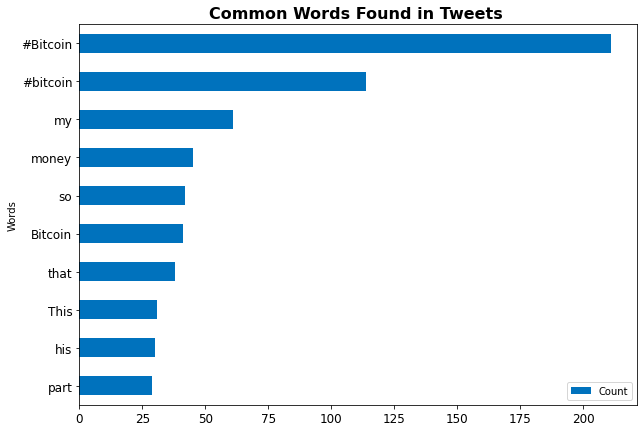

In [20]:
fig, ax = plt.subplots(figsize=(10, 7))

# Plot horizontal bar graph
clean_filterwords.sort_values(by='Count').plot.barh(x='Words',
                      y='Count',
                      ax=ax,
                      color="#0072BD")

ax.set_title("Common Words Found in Tweets ", fontsize=16, fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.show()

In [21]:
for item in [screen_names]:
    c = Counter(item)
    clean_screennames=pd.DataFrame(c.most_common()[:10])
    clean_screennames.columns=["Screen Names","Count"]
clean_screennames

,Screen Names,Count
0,Blockworks_,27
1,Pentosh1,22
2,BitcoinMagazine,21
3,Kriptozenciii,19
4,Tradecrypto11,18
5,Jayecane,16
6,specialash,16
7,DocumentingBTC,11
8,ChinaPumpWXC,11
9,cryptolegennd,11


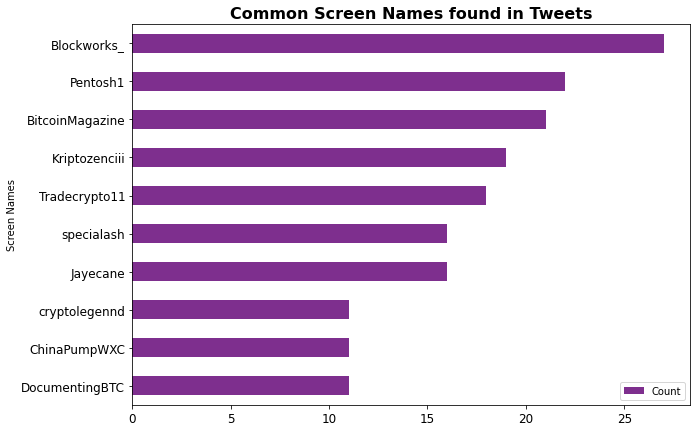

In [22]:
fig, ax = plt.subplots(figsize=(10, 7))

# Plot horizontal bar graph
clean_screennames.sort_values(by='Count').plot.barh(x='Screen Names',
                      y='Count',
                      ax=ax,
                      color="#7E2F8E")

ax.set_title("Common Screen Names found in Tweets", fontsize=16, fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.show()

In [23]:
for item in [hashtags]:
    c = Counter(item)
    clean_hastags=pd.DataFrame(c.most_common()[:10])
    clean_hastags.columns=["Hashtags","Count"]
clean_hastags

,Hashtags,Count
0,Bitcoin,236
1,bitcoin,122
2,Ethereum,21
3,BTC,20
4,crypto,15
5,dogecoin,13
6,bluesparrow,12
7,btc,12
8,gift,11
9,bluesparrowETH,10


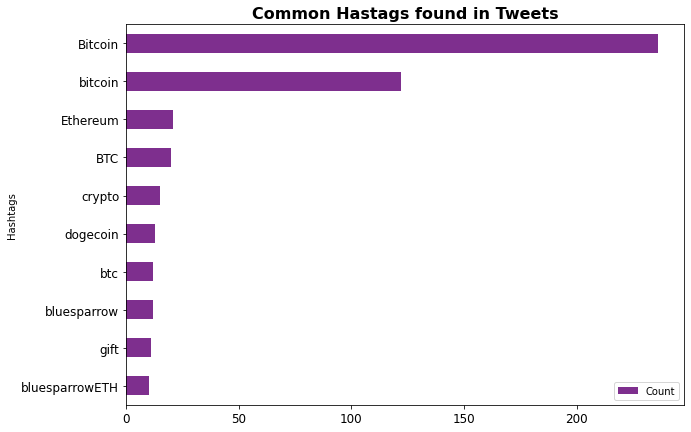

In [24]:
fig, ax = plt.subplots(figsize=(10, 7))

# Plot horizontal bar graph
clean_hastags.sort_values(by='Count').plot.barh(x='Hashtags',
                      y='Count',
                      ax=ax,
                      color="#7E2F8E")

ax.set_title("Common Hastags found in Tweets", fontsize=16, fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.show()

### Create a dataframe that shows the most retweeted statuses

In [25]:
#import itertools

retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['retweeted_status']['id'],
             status['retweeted_status']['created_at'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status.keys()
           ]

retweets.sort(reverse=True)
pd3=pd.DataFrame(list(retweets for retweets,_ in itertools.groupby(retweets)))
pd3.columns=["Retweet Count", "Screen Name", "Tweet ID", "Created At", "Text"]
pd3.head(6)

,Retweet Count,Screen Name,Tweet ID,Created At,Text
0,16087,IbaxNetwork,1456463184110497833,Fri Nov 05 03:27:37 +0000 2021,RT @IbaxNetwork: #IBAX #Airdrop is coming next...
1,5112,Cryptoahbap,1480246052024430595,Sun Jan 09 18:32:15 +0000 2022,RT @Cryptoahbap: Evet #bitcoin sayesinde milyo...
2,4262,leonarbuke,1480281026291249164,Sun Jan 09 20:51:13 +0000 2022,RT @leonarbuke: Daha önce de yapmıştım ama bek...
3,4212,TechDev_52,1449929136391311362,Mon Oct 18 02:43:39 +0000 2021,RT @TechDev_52: Every #Bitcoin cycle in histor...
4,2972,LovecoinProject,1476760939164680195,Fri Dec 31 03:43:39 +0000 2021,"RT @LovecoinProject: ❤️10,000,000 LOVECOIN GIV..."
5,2941,BitcoinMagazine,1470834008699424770,Tue Dec 14 19:12:09 +0000 2021,RT @BitcoinMagazine: Bank of England: Bitcoin ...


In [26]:
emoji_summary = adv.extract_emoji(pd3['Text'])
emoji_summary.keys()

dict_keys(['emoji', 'emoji_text', 'emoji_flat', 'emoji_flat_text', 'emoji_counts', 'emoji_freq', 'top_emoji', 'top_emoji_text', 'top_emoji_groups', 'top_emoji_sub_groups', 'overview'])

In [27]:
emoji_summary["overview"]["num_emoji"]

135

In [28]:
emoji_list=emoji_summary["top_emoji"][:11]
emoji_list

[('🔥', 11),
 ('🎁', 7),
 ('✅', 7),
 ('🚨', 6),
 ('💵', 5),
 ('💥', 4),
 ('🚀', 4),
 ('🎉', 4),
 ('👇', 4),
 ('💎', 4),
 ('👀', 4)]

In [29]:
emoji_df=pd.DataFrame(emoji_list)
emoji_df.rename(columns={0:'Emoji',1:'Count'},inplace=True)
emoji_df

,Emoji,Count
0,🔥,11
1,🎁,7
2,✅,7
3,🚨,6
4,💵,5
5,💥,4
6,🚀,4
7,🎉,4
8,👇,4
9,💎,4


There are 22955 words in the combination of all review.


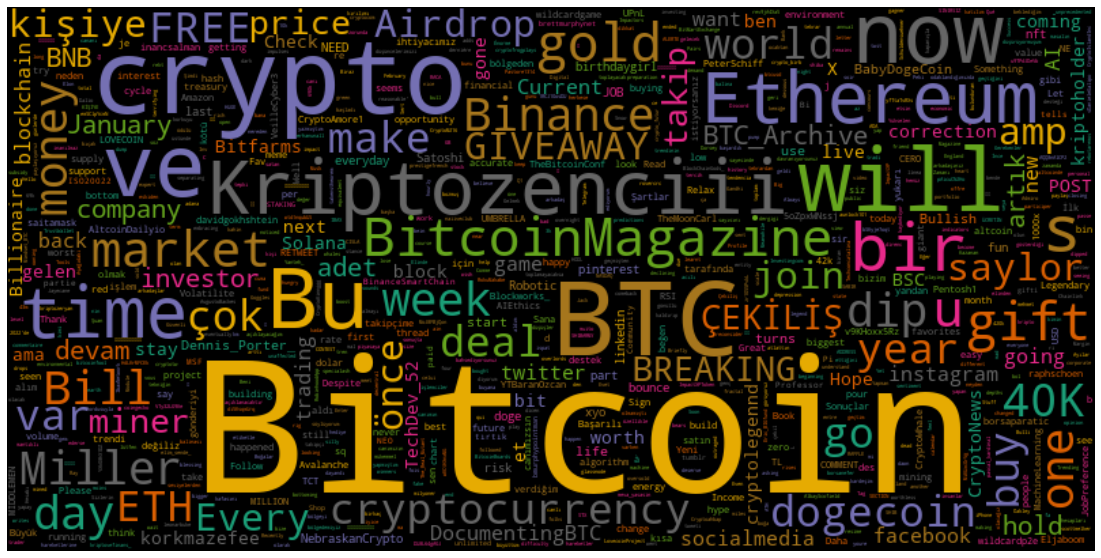

In [30]:
# Read the whole text.
text = " ".join(review for review in pd3.Text)

stopwords = set(STOPWORDS)

stopwords.update(["RT", "e", "RT ", "https", "la", "en", "que" , "el" ,"se" ,"del", "de", "le", "al", "co", "lo", "y", "t", "si", "ni", "su", "tu", "Ni", "como", "para", "los", "les","e"])

print ("There are {} words in the combination of all review.".format(len(text)))


# Generate a word cloud image

wordcloud = WordCloud(colormap="Dark2", background_color="black", stopwords=stopwords, max_words=2000, collocations=False, width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
import string# image.show()

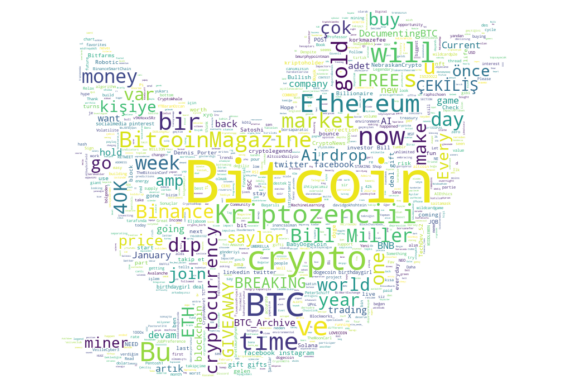

In [31]:
# Para este código, la imagen debe de tener un fondo blanco

# Create a word cloud image

twitter_mask = np.array(Image.open("resources/twitter.jpg"))

wc = WordCloud(background_color="white", max_words=4000, mask=twitter_mask,
               stopwords=stopwords, contour_width=2, contour_color='white')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("resources/twitter1.png")

# show
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

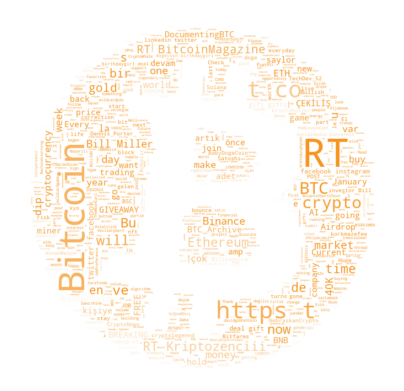

In [32]:
# Read the whole text.
text =  " ".join(review for review in pd3.Text)

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
mask = np.array(Image.open("resources/bitcoin.jpg"))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=10000, mask=mask,contour_width=0, contour_color='orange',
               stopwords=stopwords)

# generate word cloud
wc.generate(text)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()